# The CRRA family utility functions

The constant relative risk-aversion family of utility functions are the family explored in Haghani & White's book. They have the property that it implies the same level of risk aversion to percentage changes of wealth, regardless of your absolute level of wealth.

E.g. if you have a CRRA utility and losing 10% of your wealth is equivalent to making 15%, given a starting wealth of $1M, then that ratio will be equivalent in utility terms at every other wealth level too.

CRRA utility is written as

$$U(W) = \frac{1-W^{1-\gamma}}{\gamma - 1}$$

where $\gamma$ is your risk aversion parameter (a typical value is $\gamma=2$), and $W$ is your wealth.

In [1]:
import numpy as np
import polars as pl
import seaborn as sb
import matplotlib.pyplot as plt 

plt.style.use("../matplotlibrc")

In [2]:
def crra_utility(w: np.ndarray, *, gamma: float):
    if gamma == 1:
        return np.log(w)
    return (1 - w**(1-gamma)) / (gamma - 1)

In [3]:
w = np.linspace(0.5, 1.5, 100)
gamma_to_name = {
    0: "$\gamma = 0$, Risk neutral (expected returns)",
    1: "$\gamma = 1$, Kelly bettor",
    2: "$\gamma = 2$, Base-case investor",
    3: "$\gamma = 3$, Risk-averse investor"
}

In [4]:
wealth_vs_utility = []

for gamma, name in gamma_to_name.items():
    utility = crra_utility(w, gamma=gamma)
    df = pl.DataFrame({"wealth": w})
    df = df.with_columns(
        pl.Series(name="utility", values=utility),
        pl.lit(gamma_to_name[gamma], dtype=pl.Utf8()).alias("gamma")
    )

    wealth_vs_utility.append(df)
wealth_vs_utility = pl.concat(wealth_vs_utility)

<Axes: xlabel='wealth', ylabel='utility'>

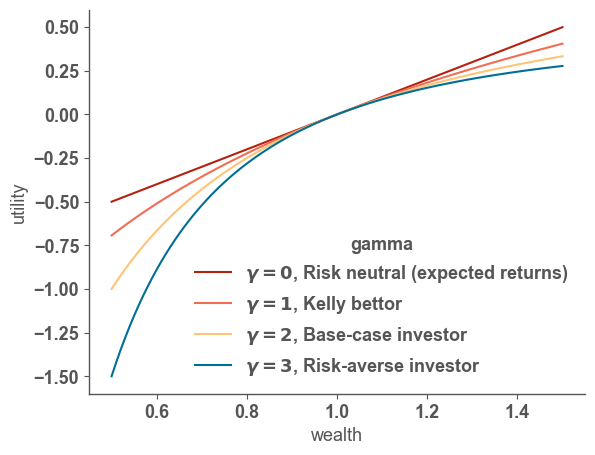

In [5]:
sb.lineplot(wealth_vs_utility, x="wealth", y="utility", hue="gamma", markers=True)

When $\gamma=0$, you are an expected-returns maximizer, you have no cost to risk, and your utility is a linear function of wealth.

## A coin flipping example